<AxesSubplot:>

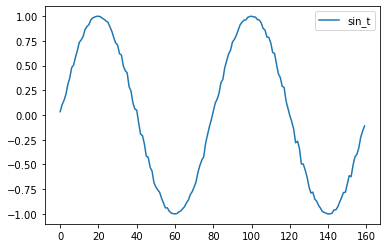

In [1]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df[["sin_t"]].head(steps_per_cycle * 2).plot()


In [6]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].values)
        docY.append(data.iloc[i+n_prev].values)
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev = 100):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train), (X_test, y_test)


In [7]:
length_of_sequences = 100
(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], n_prev =length_of_sequences)  

In [11]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM


in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.fit(X_train, y_train, batch_size=600, epochs=15, validation_split=0.05) 

Epoch 1/15
6/6 [==============================] - 29s 4s/step - loss: 0.2383 - val_loss: 0.1434
Epoch 2/15
6/6 [==============================] - 29s 5s/step - loss: 0.0790 - val_loss: 5.7708e-04
Epoch 3/15
6/6 [==============================] - 31s 5s/step - loss: 0.0017 - val_loss: 0.0236
Epoch 4/15
6/6 [==============================] - 28s 5s/step - loss: 0.0151 - val_loss: 0.0092
Epoch 5/15
6/6 [==============================] - 30s 5s/step - loss: 0.0081 - val_loss: 0.0123
Epoch 6/15
6/6 [==============================] - 43s 7s/step - loss: 0.0094 - val_loss: 0.0085
Epoch 7/15
6/6 [==============================] - 43s 7s/step - loss: 0.0079 - val_loss: 0.0108
Epoch 8/15
6/6 [==============================] - 29s 5s/step - loss: 0.0082 - val_loss: 0.0112
Epoch 9/15
6/6 [==============================] - 28s 4s/step - loss: 0.0079 - val_loss: 0.0100
Epoch 10/15
6/6 [==============================] - 27s 5s/step - loss: 0.0083 - val_loss: 0.0083
Epoch 11/15
6/6 [==================

In [12]:
predicted = model.predict(X_test) 

<AxesSubplot:>

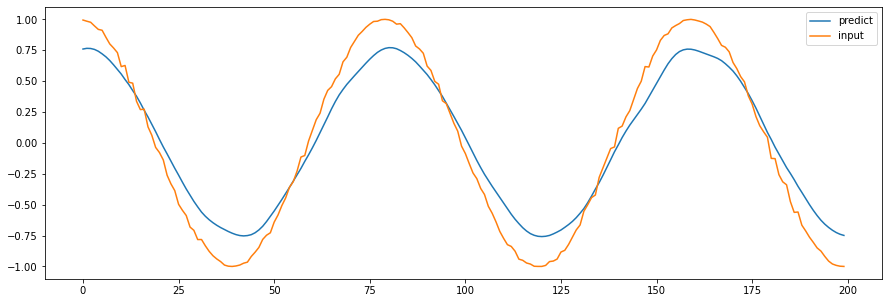

In [13]:
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))

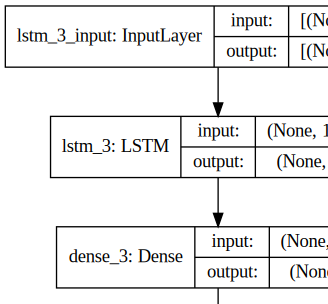

In [19]:
from IPython.display import SVG
#from keras.utils.visualize_util import model_to_dot, plot
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))